<font size="5"><b>Importación de librerías y csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import functions as fns

In [2]:
#Se importa el csv. Hubo que cambiar el encoder.
granos = pd.read_csv('estimaciones.csv', delimiter=',', encoding='latin-1')

<font size="5"><b>EDA

In [3]:
#Se revisa que el csv no tenga nulls en principio
col_nulls = granos.isnull().any()
col_nulls

id_provincia       False
provincia          False
id_departamento    False
departamento       False
id_cultivo         False
cultivo            False
id_campaña         False
campaña            False
sup_sembrada       False
sup_cosechada      False
produccion         False
rendimiento        False
dtype: bool

In [4]:
#Se busca el nombre de las columnas del DataFrame
columnasgranos=granos.columns
columnasgranos

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada ',
       'sup_cosechada', 'produccion ', 'rendimiento'],
      dtype='object')

In [5]:
#Puede notarse que producción tenía un espacio al final, por lo cual se renombra para quitar al mismo
granos.rename (columns={'produccion ' : 'produccion'}, inplace=True)

In [6]:
#Print de la estrctura del DataFrame
granos.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333
1,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000
2,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467
3,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500
4,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500


In [7]:
departamentos = granos.groupby(['provincia','departamento'])['id_departamento'].count()
departamentos = pd.DataFrame(departamentos)
departamentos.reset_index(level = "departamento", inplace=True)
departamentos.sort_values("id_departamento", ascending=False, inplace=True)
print (departamentos.head(10))
print (departamentos.shape)

                 departamento  id_departamento
provincia                                     
SANTA FE     GENERAL OBLIGADO              637
SANTA FE         CONSTITUCION              614
SANTA FE           SAN JAVIER              607
SANTA FE              ROSARIO              606
SANTA FE          SAN LORENZO              598
SANTA FE        GENERAL LOPEZ              595
SANTA FE           LA CAPITAL              589
CORDOBA    GENERAL SAN MARTIN              587
SANTA FE         SAN JERONIMO              586
CORDOBA            RIO CUARTO              578
(516, 2)


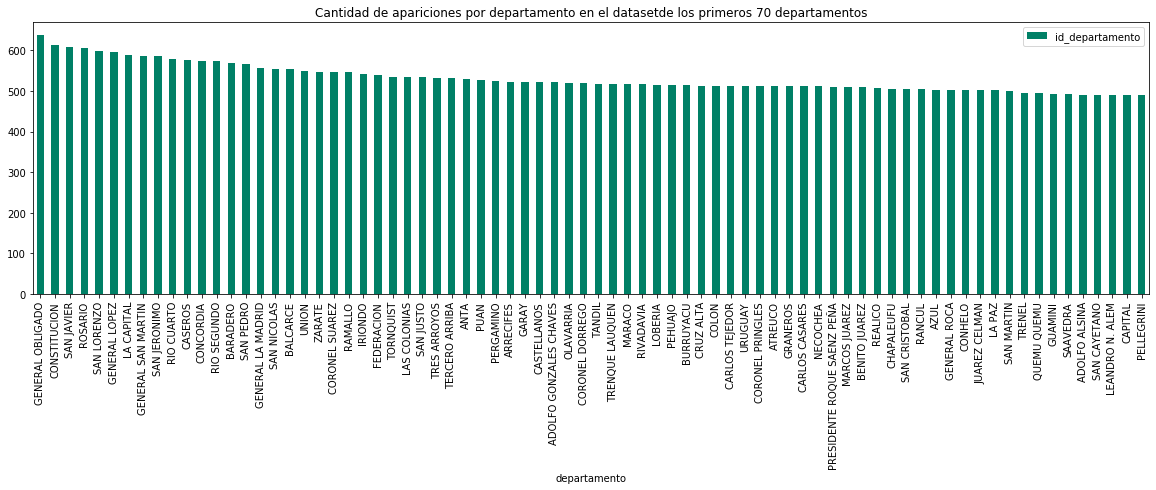

In [8]:
depar75 = departamentos.nlargest(76,"id_departamento")
rcParams["figure.figsize"] = [20, 5]
depar75.plot(kind ="bar", x="departamento", y=["id_departamento"], title="Cantidad de apariciones por departamento en el datasetde los primeros 70 departamentos", colormap="summer")

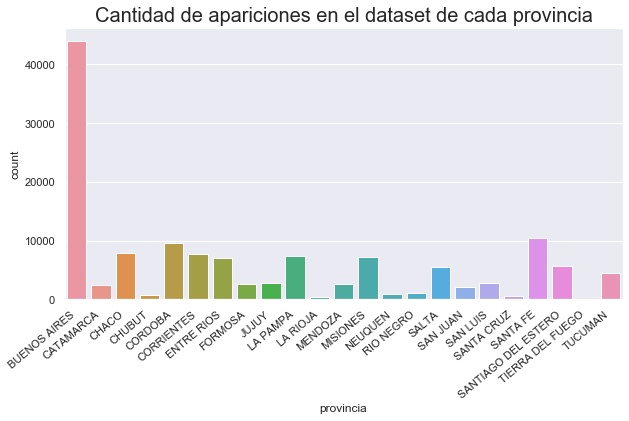

In [9]:
sns.set_context("paper")
sns.set(rc={'figure.figsize':(10,5)})
rcParams['axes.titlesize'] = 20
ax = sns.countplot(x="provincia", data=granos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de apariciones en el dataset de cada provincia")
plt.show()

In [10]:
#Genero un array que tiene todos los unique values de id-provincia
x=granos.id_provincia.unique()
#Genero dos dictionaries 
d = {}
f = {}
#Con este For Loop defino una posición dentro de dict f para cada provincia, correspondiente con el id de la misma.
for j in x:
    d.clear()
#Con este For Loop defino un dict d por provincia que tendrá tantas entradas como cultivos hay. Luego guardo el dict d de
#cada provincia en la posición del dict f que le corresponde según el valor de x que se esté iterando.
    for i in range(34):
        df= granos[(granos.id_cultivo == i) & (granos.id_provincia == j)]
        df=df.groupby(['campaña'], as_index=True)['produccion'].sum()
        df=pd.DataFrame(df)
        d[i] = df.iloc[:,0]
#Copio en f[j] a d pero no lo vuelvo a referenciar con un "=" para evitar que hagan referencia a un mismo objeto.
    f[j]=dict (d)
    
#print (f[86])

Acá hay dos formas de hacer lo mismo, la primera es mediante un For Loop y la segunda es mediante el comando from_dict(df) recordando que cada posición de f contenia una entrada de d por cada cultivo mostrando su producción por campaña, se procede a transformar cada posición de f en un Dataframe que muestre por campaña la producción de todos los cultivos propios de cada provincia

Se define un nuevo dict g donde se guardarán todos los DataFrames generados a partir de las posiciones de f. Se decide cualquier fila que haga refencia a la campaña 2018/2019 ya que es muy reciente y hay varios cultivos que no tienen datos para la misma

In [11]:
#    Acá hay dos formas de hacer lo mismo, la primera es mediante un For Loop y la segunda es mediante el comando from_dict(df)
#    Recordando que cada posición de f contenia una entrada de d por cada cultivo mostrando su producción por campaña, se 
#    procede a transformar cada posición de f en un Dataframe que muestre por campaña la producción de todos los cultivos 
#    propios de cada Provincia

#BsAs1=pd.DataFrame()
#BsAs2=pd.DataFrame()
#for i in range(67):
#    BsAs1=BsAs2
#    BsAs2=pd.concat([BsAs1,d[i]], axis=1)
#BsAs1=BsAs2

#    Se define un nuevo dict g donde se guardarán todos los DataFrames generados a partir de las posiciones de f. Se decide
#    cualquier fila que haga refencia a la campaña 2018/2019 ya que es muy reciente y hay varios cultivos que no tienen datos
#    para la misma
g = {}
for i in x:
    g[i] = pd.DataFrame.from_dict(f[i])
    if '2018/2019' in g[i].index:
        g[i].drop(labels='2018/2019', axis=0, level=None, inplace=True, errors='raise')
    

La creación de un df de los cultivos de cada provincia año a año tiene un problema que es que se generan muchos NaNs debido a que no todas las provincias tienen todos los cultivos ni hay datos de los cultivos para todos los años en todas las provincias. Es debido a esto que se procede a eliminar todas las plantaciones que tengan NaNs en cada provincia. Se tomó esta decisión ya que, tomando como ejemplo a la Pronvincia de Buenos Aires, los datos de la plantación de cebolla llegaban sólo hasta 1998 y sin embargo, sabemos por otras fuentes, que el cultivo de cebolla nunca se interrumpió en la provincia y que el nivle de producción de lmismo fue variando en el tiempo. Es por todo esto que se decidió elimianr los NaNs en vez de asignarles un valor promedio o nulo ya que hacer esto no sería representativo de la realidad.

A partir de este punto cambiamos el enfoque del trabajo y decidimos enfocarnos sólo en los cultivos más importantes de cada provincia que son aquellos para los cuales hay un censo completo en todos los años.

In [12]:
#   Con este for se puede chequear el shape del DataFrame de cada provincia si se saca el comentario del print
for i in x:
#    print (i)
    g[i].dropna(axis=1, inplace=True)
#print (g[i].shape)


In [13]:
#    Imprimo el DataFrame correspondiente a Buenos Aires para visualizarlo y ver su forma.
g[6].head(50)

,3,9,12,14,20,25,26,28,32
1969/1970,104000,412800.0,252500,743300,4300.0,1600.0,880000.0,4882600,3729800.0
1970/1971,37480,273300.0,92500,448000,1150.0,1600.0,925000.0,3255000,3769500.0
1971/1972,23600,391000.0,168000,502100,7500.0,2020.0,615000.0,3500000,2509500.0
1972/1973,31100,620000.0,373000,475000,9200.0,6285.0,881000.0,5266920,3775500.0
1973/1974,29800,456000.0,250000,577000,20700.0,85000.0,2000000.0,3794000,4359400.0
1974/1975,20300,258300.0,144000,358300,19000.0,37000.0,990000.0,3440000,3059400.0
1975/1976,25000,346900.0,150700,595000,37300.0,62300.0,1611000.0,4300000,3239750.0
1976/1977,31400,560000.0,160000,490000,31000.0,74000.0,1510000.0,6000000,3999300.0
1977/1978,52800,232000.0,88000,980000,48000.0,320000.0,2000000.0,3000000,4699300.0
1978/1979,44700,406000.0,129000,900000,25000.0,520000.0,1300000.0,5100000,3669400.0


In [14]:
#   Se crean dos tablas, una para cultivos y otra para provincias que relacionan el id con el nombre. Esto es conveniente
#   por ejemplo, en el caso de los cultivos, el número de id también coincide con la posición en el índice.

cultivos = granos.groupby(['id_cultivo'])['cultivo'].max()
cultivos = pd.DataFrame(cultivos)
#print (cultivos)
provincias = granos.groupby(['id_provincia'])['provincia'].max()
provincias = pd.DataFrame(provincias)
print (provincias)

                        provincia
id_provincia                     
6                    BUENOS AIRES
10                      CATAMARCA
14                        CORDOBA
18                     CORRIENTES
22                          CHACO
26                         CHUBUT
30                     ENTRE RIOS
34                        FORMOSA
38                          JUJUY
42                       LA PAMPA
46                       LA RIOJA
50                        MENDOZA
54                       MISIONES
58                        NEUQUEN
62                      RIO NEGRO
66                          SALTA
70                       SAN JUAN
74                       SAN LUIS
78                     SANTA CRUZ
82                       SANTA FE
86            SANTIAGO DEL ESTERO
90                        TUCUMAN
94               TIERRA DEL FUEGO


In [15]:
#  Tal como se vió antes, en el DataFrame de producción de cada provincia, las columnas tenian como label el id del cultivo
#  en vez del nombre del mismo, por lo que acá se procede a reemplazarlos haciendo uso de las tablas generadas en la celda
#  anterior.

for j in x:
    for i in range (1,34):
        if i in g[j].columns:
            k = str (cultivos.at[i,"cultivo"])
            g[j].rename(columns = { i : k}, inplace=True)

In [16]:
#  Realizo un head para revisar el resultado de la operación anterior

g[18].head(5)

,Algodón,Arroz,Maíz
1969/1970,11800.0,122200,96400.0
1970/1971,6700.0,88000,95200.0
1971/1972,9000.0,86700,8700.0
1972/1973,9000.0,64600,35500.0
1973/1974,10700.0,105000,33500.0


In [17]:
#  La siguiente función elabora un pairplot, un heatmap de correlación y un boxplot para la provincia que se le indique. Esto
#  permite visualizar la correlación entre los cultivos paa cada provincia y la distribución del nivel de producción de los 
#  mismos así como la diferencia de toneladas cosechadas entre ellos. El código de la función se encuentra en el módulo 
#  functions que fue importado al principio.

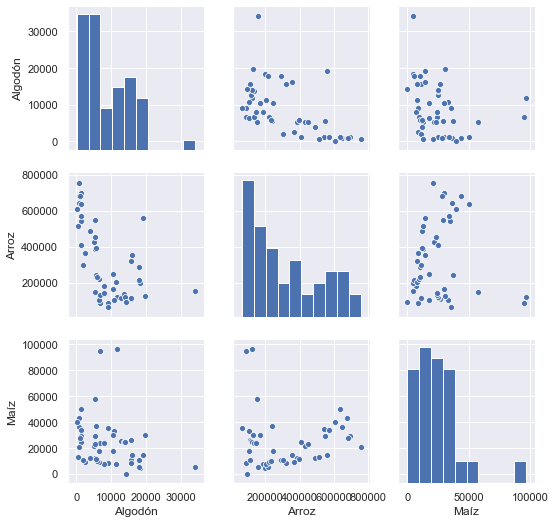

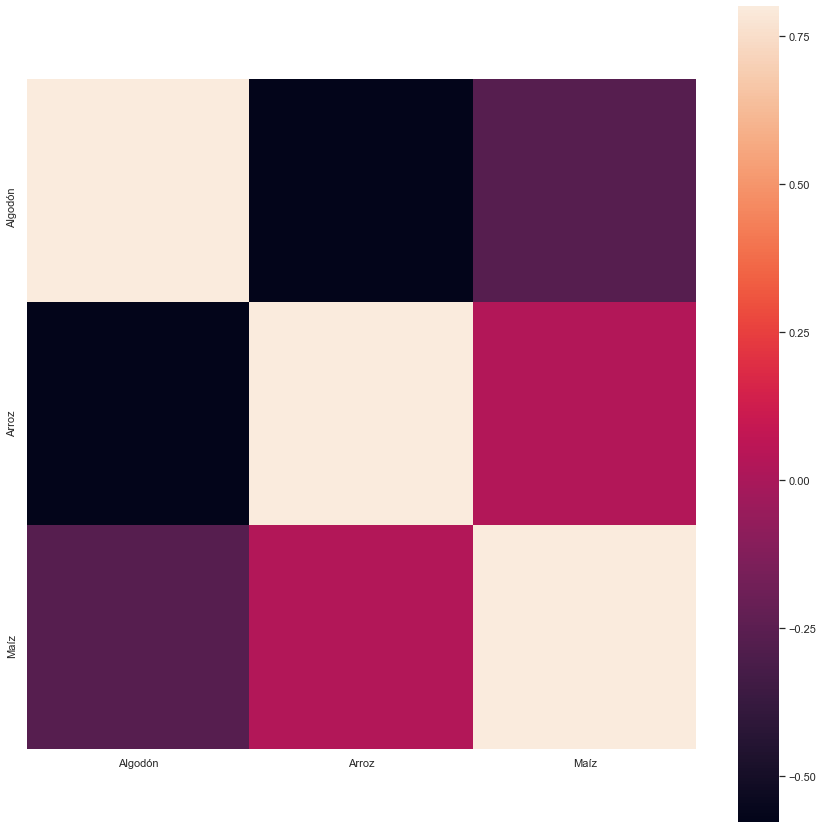

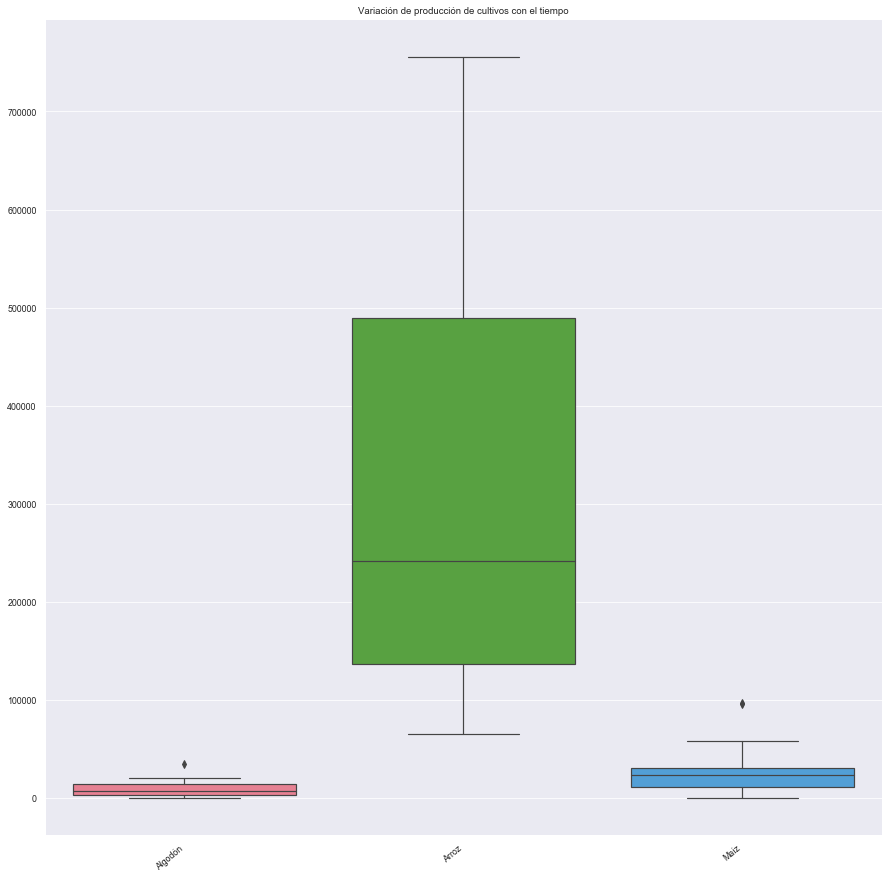

In [18]:
#  Realiza pairplot, heatmap y boxplot para los cultivos de la provincia indicada como argumento. La definición de la función
#  es analisis(Data, ID, provincia = "BUENOS AIRES") donde provincia puede tomar cualquier valor perteneciente a la columna
#  provincia del DataFrame provincias que fue impreso anteriormente (Tener en cuenta que el nombre de la provincia debe estar
#  todo en mayúsculas)

fns.analisis(g, provincias, "CORRIENTES")